## Chapter 1
### 1.introduction

1 什么是seq2seq

解决什么问题：传统深度学习（如：cnn）输入和输出的格式一般是固定的，例如输入图片尺寸固定（可以padding增大），输出分类结果固定。seq2seq的输入、输出可以是不固定的。

优点：  
1、端到端：无需输入数据预处理  
2、可处理变长度序列  
3、信息压缩表示：输入经编码器转换为固定维度的上下文向量  
4、可扩展：能够与cnn、rnn无缝衔接  

缺点：  
1、向量压缩可能存在信息损失  
2、短期记忆限制  
3、暴露偏差：训练与推理阶段的生成模式不一致  

2 什么是Encode-Decode模型

输入序列 --> 编码器 Encoder --> (上下文向量) --> 解码器 Decoder --> 输出序列  
seq --> RNN  -->  (上下文向量) --> RNN --> seq  

3 Attention 的提出

seq2seq 的缺陷：压缩导致信息损失

解决方案：编码器输出不再是固定长度的向量，而是一个向量序列（矩阵）

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

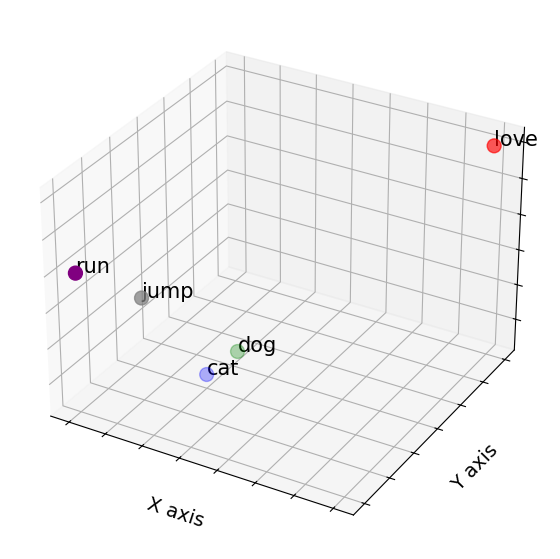

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #matplotlib字体显示
from mpl_toolkits.mplot3d import Axes3D


# 定义词汇及其对应的三维向量
words = ["cat", "dog", "love", "run", "jump"]
vectors = [[0.3, 0.4, 0.25], [0.35, 0.45, 0.3], [0.8, 0.8, 0.8], [0.1, 0.2, 0.6], [0.2, 0.3, 0.5]] #可以添加三维的词汇向量

# 将嵌套列表转换为numpy数组
vectors = np.array(vectors)

# 创建3D图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 为每个词汇及其向量绘图
scatter = ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], 
                     c=['blue', 'green', 'red', 'purple', 'grey'], s=100)

# 为每个点添加标签
for i, word in enumerate(words):
    ax.text(vectors[i, 0], vectors[i, 1], vectors[i, 2], word, size=15, zorder=1)

# 设置图形属性
ax.set_xlabel('X axis', fontsize=14)
ax.set_ylabel('Y axis', fontsize=14)
ax.set_zlabel('Z axis', fontsize=14)

# 移除坐标轴的数字标签
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# 设置背景颜色和网格线
ax.set_facecolor('white')
ax.grid(True)

# 显示图形
plt.show()

## Chapter2

### 1 词向量生成过程

1 引言

自然语言 --> 计算机能够理解的向量，有两种方法：  
独热编码：只有1个位置为1，其余为0；不具备语义信息  
分布式表征：通过向量之间的距离表示相关度，目前常用的方法为 word2vec  

2 基于统计的词向量

（1）词袋模型：不区分词语的先后顺序，无法区分语义  
（2）tf-idf：根据词频区分重要性，但无法区分语义，“的、是”等高频词重要性高  

3 基于神经网络的词向量

（1）word2vec （主流模型）

CBOW ：根据上下文预测中心词， Skip-Gram : 根据中心词预测上下文  
word -> vec -> word 的过程是通过隐藏层权重矩阵（可训练）完成的  
向量的距离包含了语义，向量运算可以得到新的词汇  

（2）glove

结合统计与神经网络的方法，运算速度快，但无法处理一次多义、词序关系  




### 2 Attention

#### 2.1 历史回顾

通过 word2vec 解决了自然语言向量化的问题，接下来回到经典的NLP问题：机器翻译  

早期： LSTM/RNN （编码器） --> LSTM/RNN (解码器)   
编码器的作用是对输入进行总结提炼，但无论 LSTM 还是 RNN 的性能随输出长度迅速下降，即长程依赖问题。  

注意力机制：  
在上下文向量中不仅可以考虑到所有输入词，还可以赋予每个输入词相对的重要性。




#### 2.2 注意力机制如何起作用

注意力机制：带权求和  
1、分解输入：分解为tokens  
2、挑出重要部分  
3、重要性评分  
4、分配注意力：对重要性高的部分增加注意力  
5、加权求和：

全局注意力： 2015年提出（Transformer之前），针对LSTM和RNN，把所有“隐藏状态”连接为一个矩阵，计算量非常大；

局部注意力： 在上下文向量生成中，不考虑所有编码输入，只考虑一部分以降低计算量。

### 2.3 Transformer

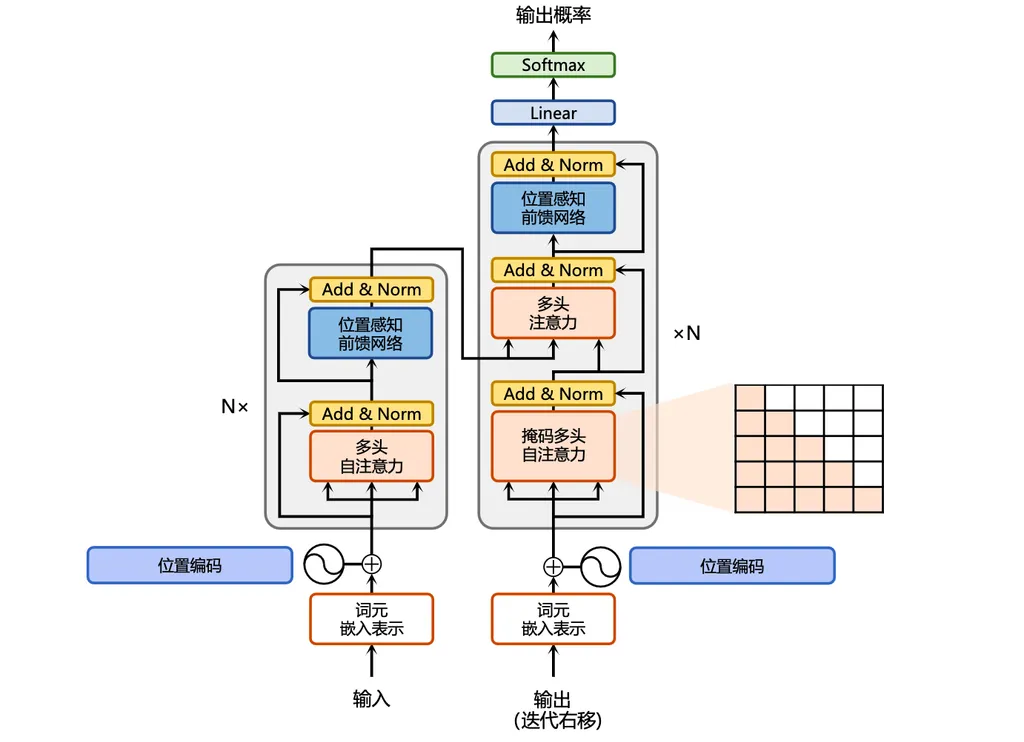

上图的Transformer的结构图，关键技术有：

1、编码器-解码器结构：把“输出”作为“输入”给到“解码器”  
2、位置编码：tranformer不具备区分词向量顺序的能力，需在输入阶段加入“位置编码”  
3、多头注意力：不同的“头”关注输入的不同部分  
4、前馈网络：捕捉序列中元素之间的复杂关系

Q、K、V 知识的引入，每个输入元素都被映射为3个向量

Query（查询）： 寻找相关度高的其他向量  
Key（键）：自身的特性、标签  
Value（值）：通过计算得到的重要性（关联性）得分  



### 代码 wordvec

In [2]:
import jieba # jieba分词库，用于对中文文本进行分词处理。
# 准备训练数据
sentences  = [ 
    list(jieba.cut( '我喜欢吃苹果' )), 
    list(jieba.cut( '苹果很好吃' )), 
    list(jieba.cut( '水果是健康的' )), 
    list(jieba.cut( '梨子也很好吃' )), 
    list(jieba.cut( '我也喜欢吃凤梨' )), 
    list(jieba.cut( '苹果凤梨都是一种水果' )) , 
    list(jieba.cut( '苹果是一种又香又甜的水果' )), 
    list(jieba.cut( '梨子跟凤梨也是一种又香又甜的水果' )), 
]
sentences

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\庾力维\AppData\Local\Temp\jieba.cache
Loading model cost 0.482 seconds.
Prefix dict has been built successfully.


[['我', '喜欢', '吃', '苹果'],
 ['苹果', '很', '好吃'],
 ['水果', '是', '健康', '的'],
 ['梨子', '也', '很', '好吃'],
 ['我', '也', '喜欢', '吃', '凤梨'],
 ['苹果', '凤梨', '都', '是', '一种', '水果'],
 ['苹果', '是', '一种', '又', '香', '又', '甜', '的', '水果'],
 ['梨子', '跟', '凤梨', '也', '是', '一种', '又', '香', '又', '甜', '的', '水果']]

In [3]:
# 使用gensim库中的Word2Vec模型来训练词向量，并获取训练后的词向量和词汇表
from gensim. models  import  Word2Vec

# 训练词向量模型
model = Word2Vec(sentences, window=5, min_count=1, workers=4)
# 获取所有词
vocab = model.wv.index_to_key
# 获取所有词向量
vectors = model.wv[vocab]
vectors

array([[-5.3630857e-04,  2.3646720e-04,  5.1041231e-03, ...,
        -7.0426278e-03,  9.0159255e-04,  6.3935029e-03],
       [-8.6233551e-03,  3.6638153e-03,  5.1871063e-03, ...,
        -2.3919728e-03, -9.5016956e-03,  4.5148465e-03],
       [ 8.8638728e-05,  3.0799997e-03, -6.8148547e-03, ...,
         5.1378825e-04,  8.2169194e-03, -7.0118154e-03],
       ...,
       [ 1.3001668e-03, -9.8043028e-03,  4.5877625e-03, ...,
        -2.5875687e-03, -7.7571664e-03,  4.1926014e-03],
       [ 1.8002307e-03,  7.0460914e-03,  2.9446983e-03, ...,
        -1.8595541e-03,  3.6117458e-03, -7.0364270e-03],
       [ 9.7315907e-03, -9.7780135e-03, -6.4999200e-03, ...,
        -2.7000697e-03,  3.8249956e-03,  3.3858197e-04]], dtype=float32)

In [7]:
print(vectors.shape)

(19, 100)


In [8]:
vocab  # sentence 里面有多少单词 ，共19个

['水果',
 '又',
 '苹果',
 '是',
 '的',
 '一种',
 '凤梨',
 '也',
 '喜欢',
 '吃',
 '很',
 '好吃',
 '我',
 '甜',
 '梨子',
 '香',
 '健康',
 '都',
 '跟']

In [11]:
# 分析三国演义

# 导入第三方库
import jieba
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib

# 数据预处理
# 相对脚本路径  读取文本  自己选择文本 
f = open(r"./docs/chapter2/sanguoyanyi.txt",encoding='utf-8')
#f = open(r"E:/Program_python/fun-transformer-main/fun-transformer/docs/chapter2/hongloumeng.txt",encoding='utf-8')
lines = []
for line in f:
    temp = jieba.lcut(line)
    words = []
    for i in temp:
        # 去除不必要字符
        i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
                            ~·@#￥%……&* ( ) '------------'；：‘]+","",i)
        if len(i) > 0:
            words.append(i)
    if len(words) > 0:
        lines.append(words)
print(lines[:3]) # 展示前三段的分词结果

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\庾力维\AppData\Local\Temp\ipykernel_19048\322137860.py:23: SyntaxWarning: invalid escape sequence '\s'
  i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
C:\Users\庾力维\AppData\Local\Temp\ipykernel_19048\322137860.py:23: FutureWarning: Possible set difference at position 81
  i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
C:\Users\庾力维\AppData\Local\Temp\ipykernel_19048\322137860.py:23: FutureWarning: Possible set difference at position 83
  i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
C:\Users\庾力维\AppData\Local\Temp\ipykernel_19048\322137860.py:23: FutureWarning: Possible set difference at position 84
  i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
C:\Users\庾力维\AppData\Local\Temp\ipykernel_19048\322137860.py:23: FutureWarning: Possible set difference at position 86
  i = re.sub("[\s+\.\!\/_.$%^*(++\"\'“”《》]+|[+——！，。？、\
C:\Users\庾力维\AppData\Local\Temp\ipyker

[['三国演义', '上卷'], ['罗贯中'], ['滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红']]


In [12]:
# 调用 Word2Vec 建立模型
# 常用参数 
# vector_size: 词向量的维度;  
# window: 上下文窗口长度;  
# min_count: 少于该字段的次数的单词会被丢弃
# epochs: 迭代次数
# negative: 负采样的个数
# workers: 训练时使用的线程数

model1 = Word2Vec(lines, vector_size = 10, window=3, min_count=3, \
                 epochs=7,negative=10) # 这里为了训练速度，对参数值设置较低  

model2 = Word2Vec(lines, vector_size = 100, window=5, min_count=5, \
                  epochs=50,negative=10) # 对比模型

# 输入一个路径，保存训练好的模型，其中./data/model目录事先要存在
model1.save("word2vec_gensim1")
model2.save("word2vec_gensim2")


# 查看 “林黛玉” 的词向量
# print(model1.wv.get_vector("林黛玉"))

# 查看与“备”最相近的前5个词
print(model1.wv.most_similar('备',topn=2))
# 查看与“操”最相近的前5个词
print(model2.wv.most_similar('操',topn=5))

# 查看“刘备”与“曹操”的相似度
print(model1.wv.similarity('刘备', '曹操'))
print(model1.wv.similarity('备', '操'))
print(model2.wv.similarity('刘备', '曹操'))
print(model2.wv.similarity('备', '操'))

[('使君', 0.9984196424484253), ('计', 0.9971262812614441)]
[('超', 0.4657573401927948), ('操大怒', 0.4391728937625885), ('攸', 0.4061984419822693), ('荀彧', 0.368038535118103), ('衡', 0.3675123155117035)]
0.8077869
0.83808714
0.33065253
0.024601571


In [15]:
import matplotlib.font_manager as fm

# 查找系统中可用的中文字体
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 列出所有包含中文字体的字体文件
chinese_fonts = []
for font in font_list:
    if any(char in font for char in ['SimHei', 'SimSun', 'MSYH', 'MSYHBD', 'MSYHL']):
        chinese_fonts.append(font)

if chinese_fonts:
    print("找到以下中文字体：")
    for font in chinese_fonts:
        print(font)
else:
    print("未找到中文字体，可能需要安装。")

找到以下中文字体：
C:\Users\庾力维\AppData\Local\Microsoft\Windows\Fonts\SimHei.ttf


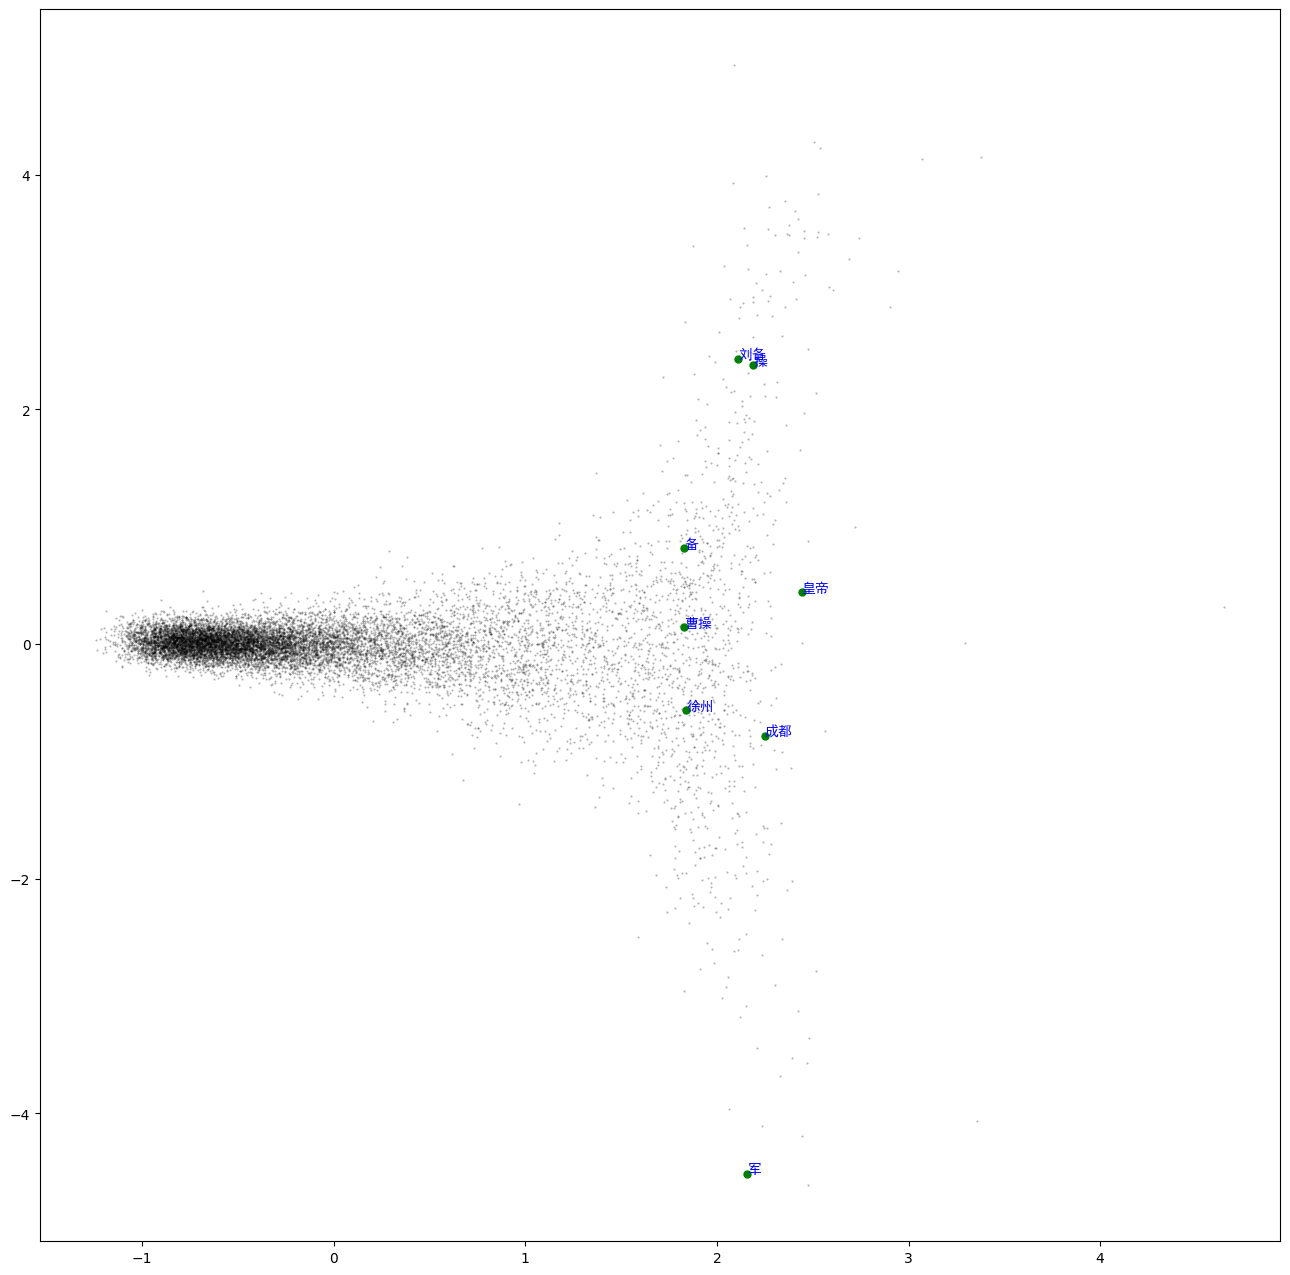

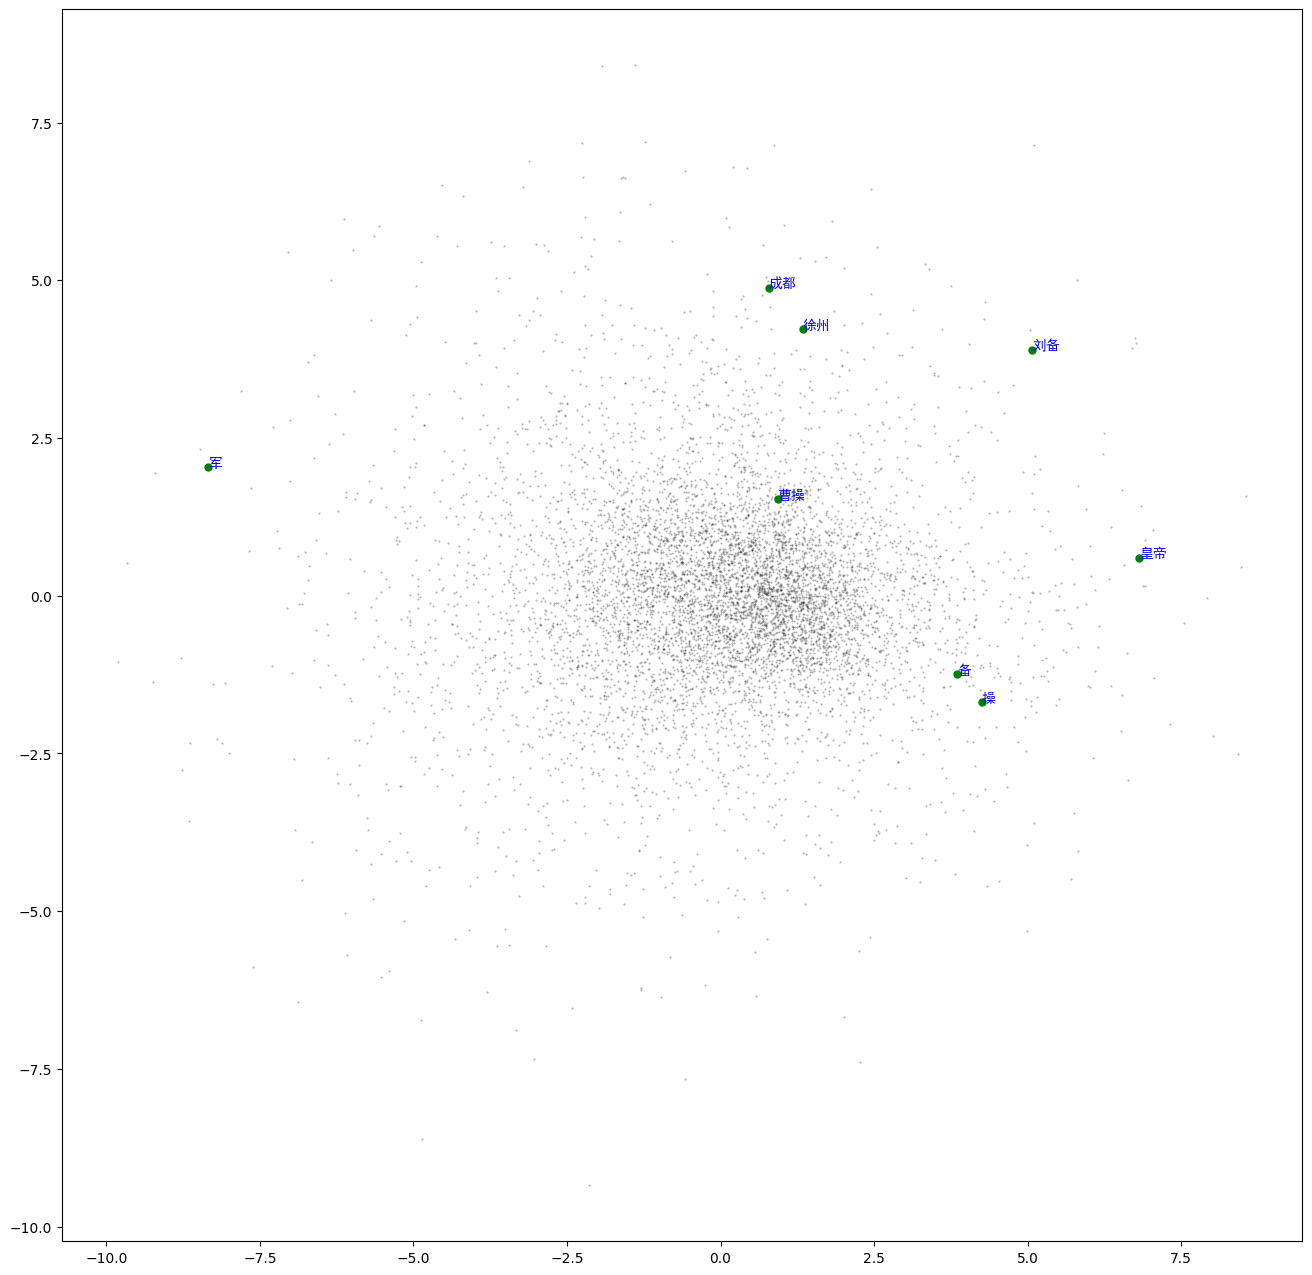

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm

def plot_word_vectors(model, words_to_plot):
    rawWorVec = []
    word2ind = {}
    for i, w in enumerate(model.wv.index_to_key):
        rawWorVec.append(model.wv[w])
        word2ind[w] = i

    rawWorVec = np.array(rawWorVec)
    X_reduced = PCA(n_components=2).fit_transform(rawWorVec)

    fig = plt.figure(figsize=(16, 16))
    ax = fig.gca()
    ax.set_facecolor('white')
    ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize=1, alpha=0.3, color='black')

    # 查找系统中可用的中文字体
    font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
    for font in font_list:
        if 'SimHei' in font:
            zhfont1 = fm.FontProperties(fname=font, size=10)
            break
    else:
        print("未找到 SimHei 字体，可能需要安装。")
        return

    for w in words_to_plot:
        if w in word2ind:
            ind = word2ind[w]
            xy = X_reduced[ind]
            plt.plot(xy[0], xy[1], '.', alpha=1, color='green', markersize=10)
            plt.text(xy[0], xy[1], w, alpha=1, color='blue', fontproperties=zhfont1)

    plt.show()

# 假设已经加载了词向量模型
# 这里需要根据实际情况加载模型，例如：
# from gensim.models import Word2Vec
# model = Word2Vec.load('your_model.bin')

words = ['备', '操','刘备','曹操', '成都', '军', '徐州', '皇帝']
plot_word_vectors(model1, words)
plot_word_vectors(model2, words)